In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_csv("combined_results.csv")
results = results.drop(columns=["Submitted By"])

In [3]:
results

,Method,Checkpoint,data_set,Num_Epochs,Model_Used,ROUGE Real Authors,Prob. Real Authors,Truth Ratio Real Authors,ROUGE Real World,Prob. Real World,Truth Ratio Real World,ROUGE Retain,Prob. Retain,Truth Ratio Retain,ROUGE Forget,Prob. Forget,Truth Ratio Forget,Model Utility,Forget Quality
0,idk,12,forget05,10,gemma-2b,0.719333,0.457198,0.574130,0.729345,0.504617,0.637403,0.696381,0.809629,0.550578,0.726891,0.829369,0.431453,0.611071,2.564543e-07
1,idk,120,forget05,10,gemma-2b,0.628333,0.441174,0.558192,0.773789,0.474483,0.585838,0.520843,0.643100,0.491031,0.017056,0.420421,0.558434,0.553233,1.715727e-03
2,idk,75,forget05,10,gemma-2b,0.573333,0.437250,0.551229,0.790598,0.465266,0.579466,0.458013,0.578606,0.485218,0.041214,0.405134,0.556953,0.530729,1.090107e-03
3,idk,62,forget05,10,gemma-2b,0.543333,0.423001,0.529857,0.776353,0.449341,0.552427,0.451464,0.568796,0.480753,0.058170,0.424709,0.566141,0.515205,3.293965e-03
4,idk,87,forget05,10,gemma-2b,0.618333,0.443914,0.559875,0.816239,0.468099,0.584322,0.472092,0.595213,0.484037,0.012691,0.411145,0.563295,0.542393,1.370176e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,grad_ascent,8,forget01,5,phi,0.387333,0.373998,0.454016,0.741453,0.411555,0.501424,0.921348,0.931269,0.484390,0.954495,0.932760,0.475003,0.515624,3.018184e-03
426,grad_diff,10,forget01,5,phi,0.387333,0.373998,0.454016,0.741453,0.411555,0.501424,0.921348,0.931269,0.484390,0.954495,0.932760,0.475003,0.515624,3.018184e-03
427,grad_diff,12,forget01,5,phi,0.387333,0.373998,0.454016,0.741453,0.411555,0.501424,0.921348,0.931269,0.484390,0.954495,0.932760,0.475003,0.515624,3.018184e-03
428,grad_diff,6,forget01,5,phi,0.387333,0.373998,0.454016,0.741453,0.411555,0.501424,0.921348,0.931269,0.484390,0.954495,0.932760,0.475003,0.515624,3.018184e-03


In [4]:
results.dtypes

Method                       object
Checkpoint                    int64
data_set                     object
Num_Epochs                    int64
Model_Used                   object
ROUGE Real Authors          float64
Prob. Real Authors          float64
Truth Ratio Real Authors    float64
ROUGE Real World            float64
Prob. Real World            float64
Truth Ratio Real World      float64
ROUGE Retain                float64
Prob. Retain                float64
Truth Ratio Retain          float64
ROUGE Forget                float64
Prob. Forget                float64
Truth Ratio Forget          float64
Model Utility               float64
Forget Quality              float64
dtype: object

## Analysis on Evaluation Metrics

In [5]:
forget01_rogue = results[results.data_set=="forget01"][["Model_Used","Method","Checkpoint","Num_Epochs","ROUGE Forget","ROUGE Retain","ROUGE Real World","data_set"]].sort_values(by=["ROUGE Forget","ROUGE Retain","ROUGE Real World"],ascending=[True,False,False])
forget01_rogue

,Model_Used,Method,Checkpoint,Num_Epochs,ROUGE Forget,ROUGE Retain,ROUGE Real World,data_set
324,phi,idk,20,10,0.223675,0.715553,0.776353,forget01
354,phi,grad_ascent,24,10,0.411628,0.676570,0.734900,forget01
351,phi,grad_ascent,22,10,0.444054,0.741091,0.741453,forget01
352,phi,grad_ascent,20,10,0.494477,0.842015,0.754274,forget01
334,phi,KL,20,10,0.502066,0.841580,0.762821,forget01
...,...,...,...,...,...,...,...,...
427,phi,grad_diff,12,5,0.954495,0.921348,0.741453,forget01
428,phi,grad_diff,6,5,0.954495,0.921348,0.741453,forget01
429,phi,grad_diff,8,5,0.954495,0.921348,0.741453,forget01
341,phi,dpo,90,10,0.955084,0.921599,0.750000,forget01


In [49]:
results["Method"].unique()

array(['idk', 'KL', 'dpo', 'grad_ascent', 'grad_diff'], dtype=object)

In [75]:
# df = forget01_rogue.copy()
# forget1_phi_idk = forget01_rogue[(df.Model_Used=="phi") & (df.Method=="idk") & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
# forget1_phi_dpo = forget01_rogue[(df.Model_Used=="phi") & (df.Method=="dpo") & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
# forget1_phi_asc = forget01_rogue[(df.Model_Used=="phi") & (df.Method=="grad_ascent") & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
# forget1_phi_kl = forget01_rogue[(df.Model_Used=="phi") & (df.Method=="KL") & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
# forget1_phi_diff = forget01_rogue[(df.Model_Used=="phi") & (df.Method=="grad_diff") & (df.Num_Epochs==10)].sort_values(by="Checkpoint")

In [36]:
len(metrics)

3

In [70]:
## Model Utility vs Forget Quality
def mu_plot(df):
  """df should contain all metric information,checkpoint number, each menthod data"""
  # Plot setup
  fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust the number of subplots based on your metrics count

  markers = ['o', '^', 's', 'D', '*', 'x']
  # Iterate over each metric to create a subplot
  for ax, model_name in zip(axes, df["Model_Used"].unique()):
      for i,method in enumerate(df['Method'].unique()):
          subset = df[(df.Model_Used==model_name) & (df.Method==method) & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
          ax.plot(subset["Model Utility"],subset["Forget Quality"], marker=markers[i], markersize=10,label=method)
          ax.plot(subset.iloc[-1]["Model Utility"],subset.iloc[-1]["Forget Quality"], marker=markers[i], markersize=15,color="gray") ##Indicates values at last epoch
      mainset = df[(df.Model_Used==model_name) & (df.Num_Epochs==10)]
      ax.plot(mainset["Model Utility"].max(),mainset["Forget Quality"].max(), marker="p",  markersize=10, label="ideal",color="black")
      ax.set_title(model_name)
      ax.set_xlabel('Model Utility')
      ax.set_ylabel("Forget Quality")
      ax.legend(title='Method')

  plt.tight_layout()
  plt.show()


def learning_plots(df,model,metrics={}):
  # Plot setup
  fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))

  markers = ['o', '^', 's', 'D', '*', 'x']
  # Iterate over each metric to create a subplot
  for ax, metric_name in zip(axes, metrics.values()):
      for i,method in enumerate(df['Method'].unique()):
          subset = df[(df.Model_Used=="phi") & (df.Method==method) & (df.Num_Epochs==10)].sort_values(by="Checkpoint")
          k = subset.iloc[-1]["Checkpoint"]/10
          epoch_values = subset["Checkpoint"]/k
        #  susbset["Checkpoint"] = subset["Checkpoint"] - subset["Checkpoint"].min()/(subset["Checkpoint"].min() - subset["Checkpoint"].min()
          ax.plot(epoch_values, subset[metric_name], marker=markers[i],markersize=6, label=method)

      ax.set_title(metric_name)
      ax.set_xlabel('Unlearning Steps')
      ax.set_ylabel(metric_name)
      ax.legend(title='Method')

  plt.tight_layout()
  plt.show()





In [52]:
forget01= results[results.data_set=="forget01"]
df=forget01

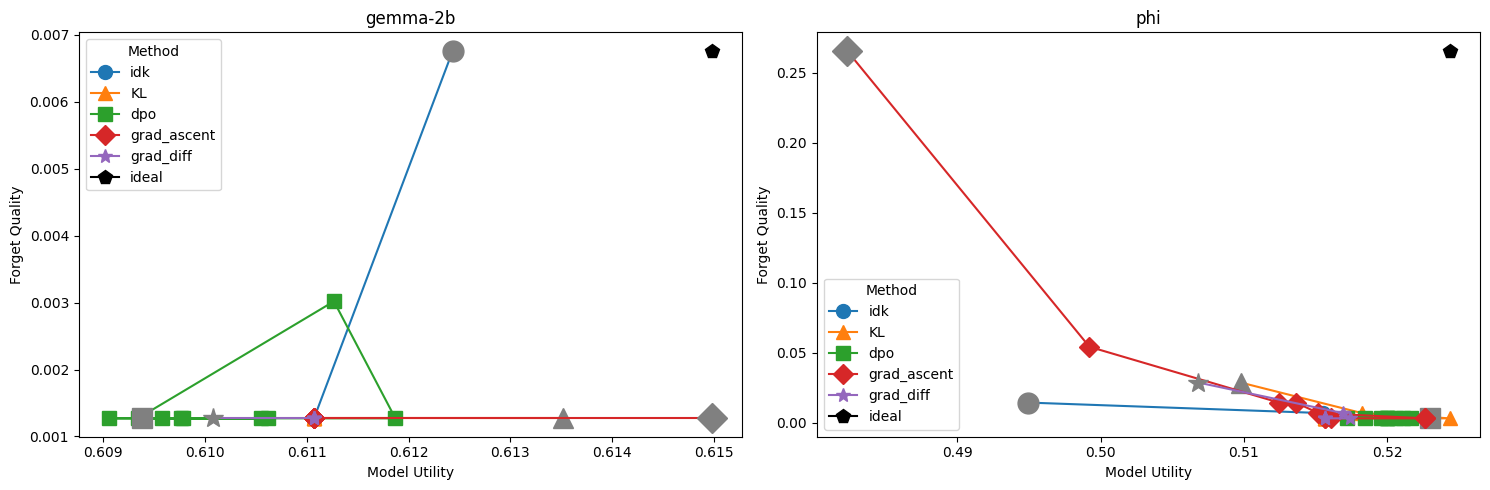

In [65]:
mu_plot(df)

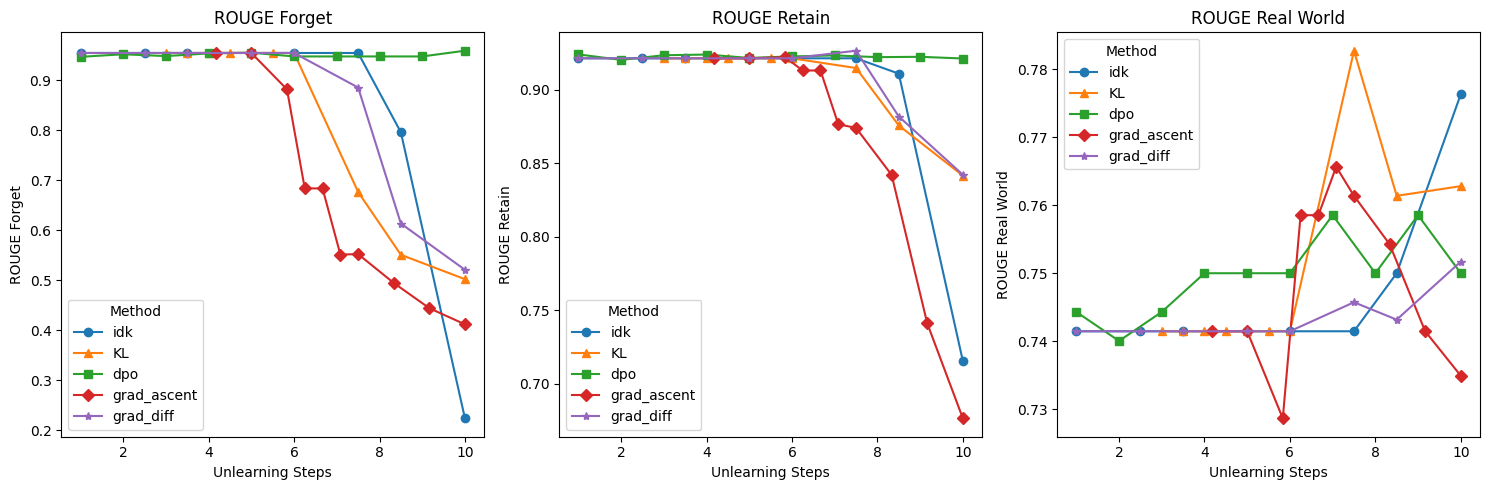

In [73]:
learning_plots(df,"phi",metrics = { 'Metric1': 'ROUGE Forget',  'Metric2': 'ROUGE Retain', 'Metric3': 'ROUGE Real World'})

## Forget05 Graphs

In [75]:
forget05= results[results.data_set=="forget05"]
df=forget05

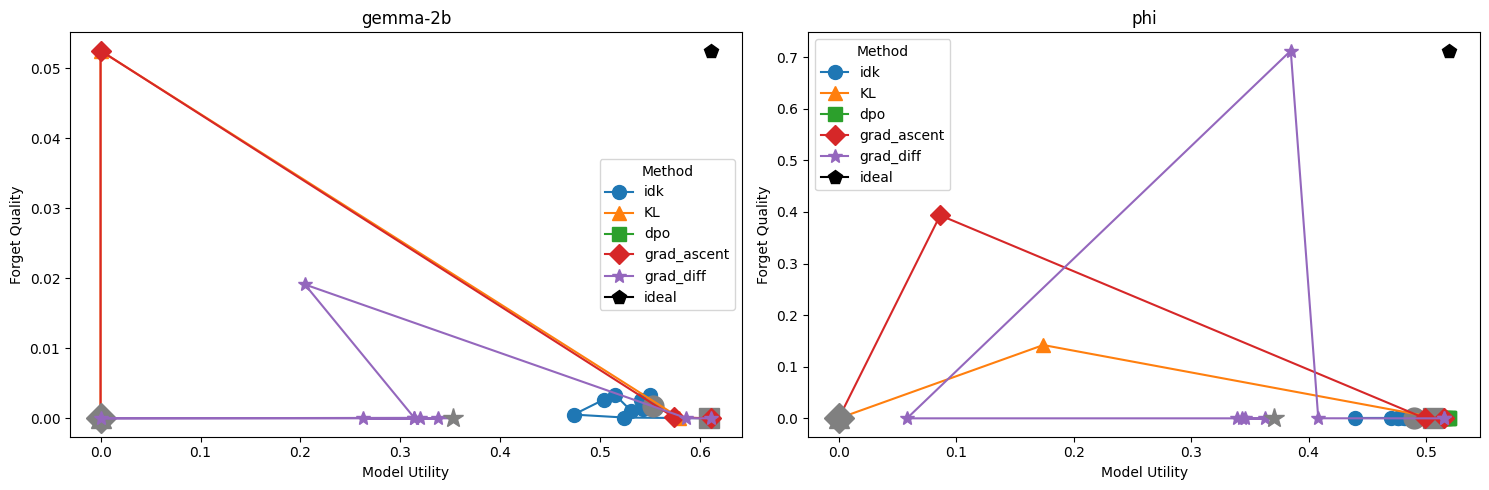

In [76]:
mu_plot(df)

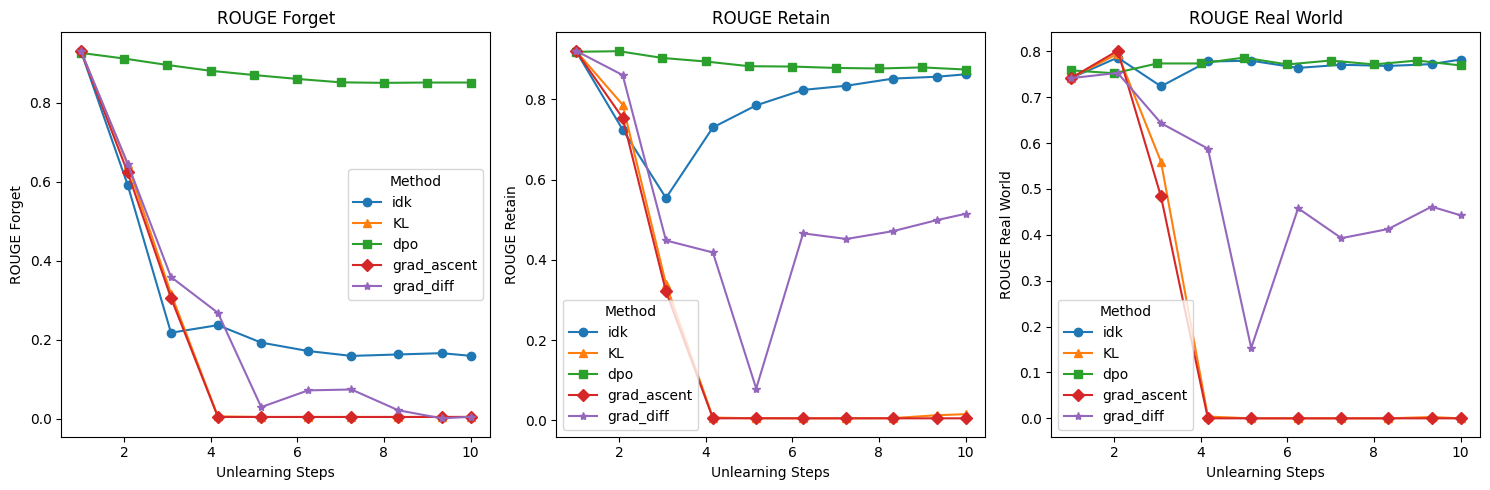

In [77]:
learning_plots(df,"phi",metrics = { 'Metric1': 'ROUGE Forget',  'Metric2': 'ROUGE Retain', 'Metric3': 'ROUGE Real World'})

## Forget10 Graphs

In [78]:
forget05= results[results.data_set=="forget10"]
df=forget05

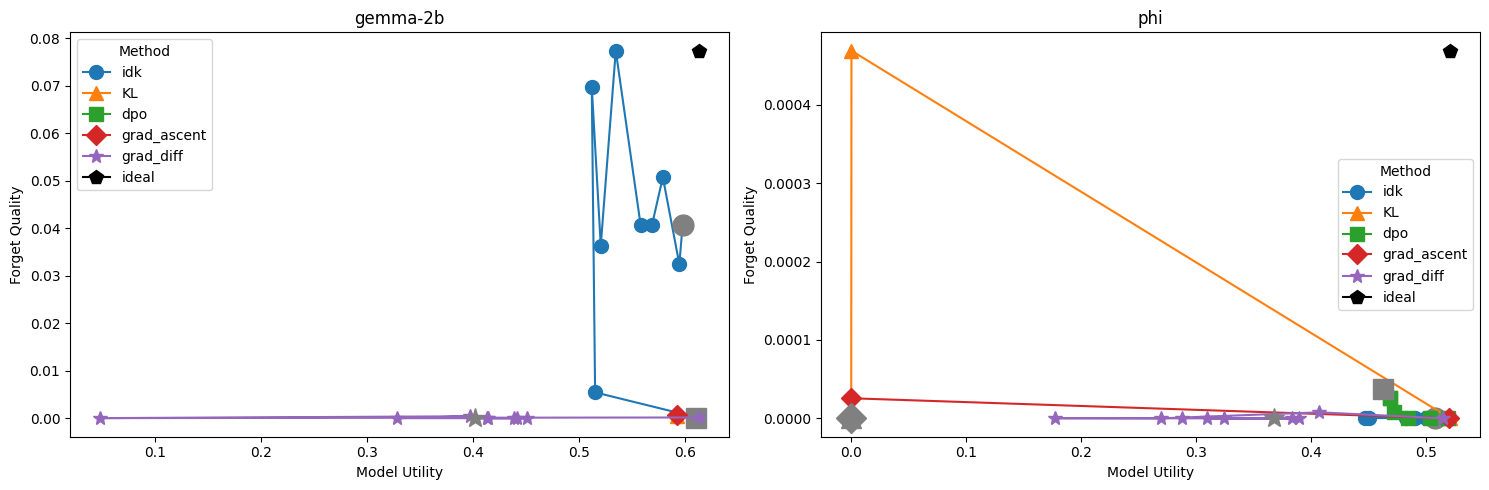

In [79]:
mu_plot(df)

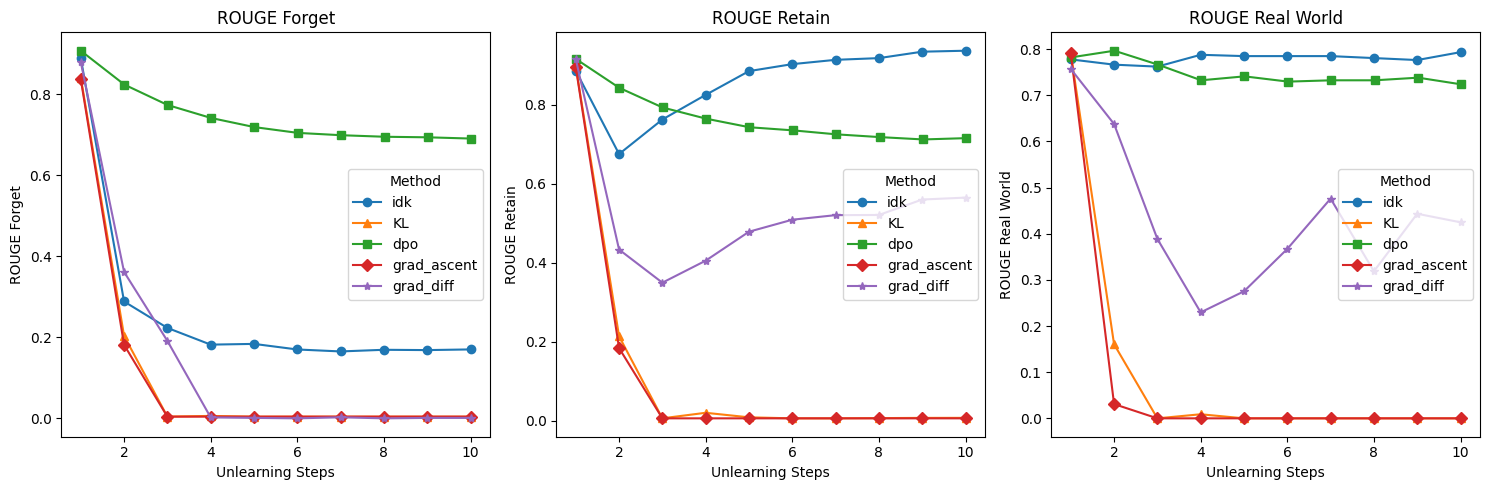

In [80]:
learning_plots(df,"phi",metrics = { 'Metric1': 'ROUGE Forget',  'Metric2': 'ROUGE Retain', 'Metric3': 'ROUGE Real World'})